In [1]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.0.2)


In [2]:
!pip install tensorflow

In [0]:
import tensorflow as tf

In [0]:
import os  
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
import logging
logger=tf.get_logger()
logger.setLevel(logging.ERROR)

In [0]:
_URL='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir= tf.keras.utils.get_file('cats_and_dogs_filterted.zip',origin=_URL,extract="True")

In [7]:
zip_dir_base=os.path.dirname(zip_dir)
! find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats


In [0]:
base_dir=os.path.join(os.path.dirname(zip_dir),'cats_and_dogs_filtered')
train_dir=os.path.join(base_dir,'train')
valid_dir=os.path.join(base_dir,'validation')

train_dogs_dir=os.path.join(train_dir,'dogs')
train_cats_dir=os.path.join(train_dir,'cats')

valid_dogs_dir=os.path.join(valid_dir,'dogs')
valid_cats_dir=os.path.join(valid_dir,'cats')

In [0]:
num_train_cats=len(os.listdir(train_cats_dir))
num_train_dogs=len(os.listdir(train_dogs_dir))

num_valid_cats=len(os.listdir(valid_cats_dir))
num_valid_dogs=len(os.listdir(valid_dogs_dir))

num_train=num_train_cats+num_train_dogs
num_valid=num_valid_cats+num_valid_dogs

In [10]:
print("number of cat images in trainset",num_train_cats)
print("number of dog images in trainset",num_train_dogs)
print("total number of images in trainset",num_train)
print("number of cat images in validationset",num_valid_cats)
print("number of dogs images in validationset",num_valid_dogs)
print("total number of images in validationset",num_valid)

number of cat images in trainset 1000
number of dog images in trainset 1000
total number of images in trainset 2000
number of cat images in validationset 500
number of dogs images in validationset 500
total number of images in validationset 1000


In [0]:
BATCH_SIZE=100
IMG_SHAPE=150

In [0]:
train_image_generator=ImageDataGenerator(rescale=1./255,vertical_flip='true',
                                         zoom_range=0.2,
                                         rotation_range=40,
                                         width_shift_range=0.2,
                                         height_shift_range=0.2,
                                         shear_range=0.2,
                                         fill_mode='nearest'                                         )
valid_image_generator=ImageDataGenerator(rescale=1./255)

In [35]:
train_data_gen=train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                         directory=train_dir,
                                                         target_size=(IMG_SHAPE,IMG_SHAPE),
                                                         shuffle='True',
                                                         class_mode='binary')

valid_data_gen=valid_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                         shuffle=True,
                                                         directory=valid_dir,
                                                         target_size=(IMG_SHAPE,IMG_SHAPE),
                                                         class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


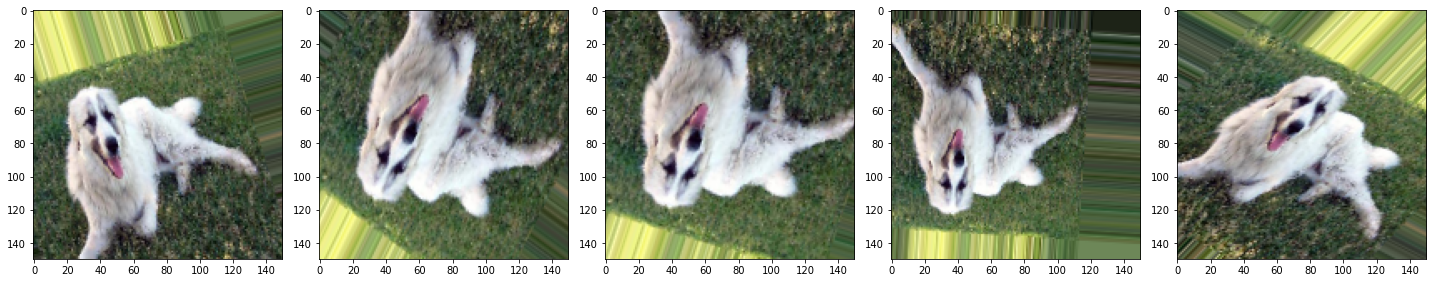

In [36]:
image_image=[train_data_gen[0][0][0] for i in range(5)]
plotImages(image_image)

In [0]:
sample_training_images, _=next(train_data_gen)

In [0]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

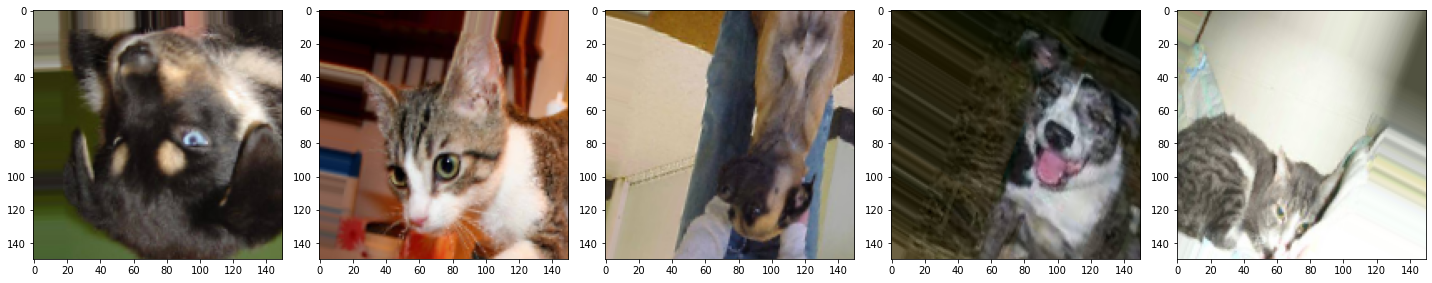

In [39]:
plotImages(sample_training_images[:5])

In [0]:
l0=tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3))
l1=tf.keras.layers.MaxPool2D((2,2))
l2=tf.keras.layers.Conv2D(64,(3,3),activation='relu')
l3=tf.keras.layers.MaxPool2D((2,2))
l4=tf.keras.layers.Conv2D(128,(3,3),activation='relu')
l5=tf.keras.layers.MaxPool2D((2,2))
l6=tf.keras.layers.Conv2D(128,(3,3),activation='relu')
l7=tf.keras.layers.MaxPool2D((2,2))
l00=tf.keras.layers.Dropout(0.5)
l8=tf.keras.layers.Flatten()
l9=tf.keras.layers.Dense(512,activation='relu')
l10=tf.keras.layers.Dense(2) 


In [0]:
model=tf.keras.models.Sequential([l0,l1,l2,l3,l4,l5,l6,l7,l00,l8,l9,l10])

In [0]:
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits='true'),
              metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [0]:
import numpy as np

In [45]:
EPOCHS=50
history=model.fit_generator(train_data_gen,
                            steps_per_epoch=int(np.ceil(num_train / float(BATCH_SIZE))),
                            epochs=EPOCHS,
                            validation_data=valid_data_gen,
                            validation_steps=int(np.ceil(num_valid / float(BATCH_SIZE)))                            )

Epoch 1/50
20/20 [==============================] - 16s 803ms/step - loss: 0.7004 - accuracy: 0.5060 - val_loss: 0.6857 - val_accuracy: 0.5720
Epoch 2/50
20/20 [==============================] - 16s 803ms/step - loss: 0.6857 - accuracy: 0.5565 - val_loss: 0.6568 - val_accuracy: 0.6040
Epoch 3/50
20/20 [==============================] - 16s 810ms/step - loss: 0.6767 - accuracy: 0.5750 - val_loss: 0.6813 - val_accuracy: 0.5340
Epoch 4/50
20/20 [==============================] - 16s 810ms/step - loss: 0.6707 - accuracy: 0.5680 - val_loss: 0.6557 - val_accuracy: 0.5810
Epoch 5/50
20/20 [==============================] - 16s 805ms/step - loss: 0.6742 - accuracy: 0.5515 - val_loss: 0.6889 - val_accuracy: 0.5160
Epoch 6/50
20/20 [==============================] - 16s 796ms/step - loss: 0.6772 - accuracy: 0.5545 - val_loss: 0.6747 - val_accuracy: 0.5460
Epoch 7/50
20/20 [==============================] - 16s 804ms/step - loss: 0.6582 - accuracy: 0.5915 - val_loss: 0.6380 - val_accuracy: 0.6190

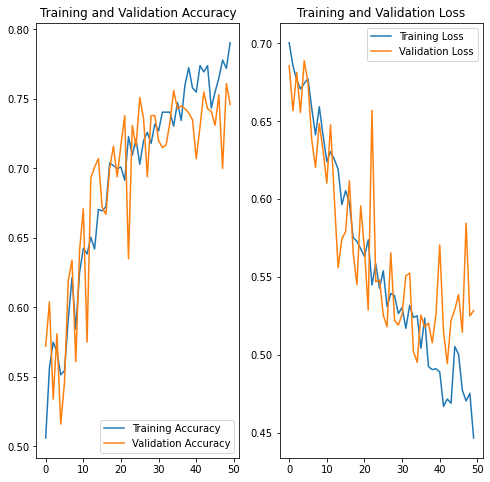

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()